In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape
df1=df.copy()
df2=df.copy()
df3=df.copy()

### Data Cleaning

In [5]:
df1["Production (Tons)"] = df1["Production (Tons)"].str.replace(".","")
df1["Production per Person (Kg)"] = df1["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df1["Acreage (Hectare)"] = df1["Acreage (Hectare)"].str.replace(".","")
df1["Yield (Kg / Hectare)"]= df1["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [6]:
df1.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
df1.rename(columns = {"Production (Tons)":"Production(Tons)"} , inplace = True)
df1.rename(columns = {"Production per Person (Kg)":"Production_per_Person(Kg)"} , inplace = True)
df1.rename(columns = {"Acreage (Hectare)" : "Acreage(Hectare)"} , inplace = True)
df1.rename(columns = {"Yield (Kg / Hectare)":"Yield(Kg / Hectare)"} , inplace = True)
df1.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df1.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg / Hectare)          1
dtype: int64

In [9]:
df1[df1["Acreage(Hectare)"].isnull()]  

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [10]:
df1=df1.dropna().reset_index()

In [11]:
df1.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [12]:
df1.drop([ "index", "Unnamed: 0" ], axis = 1, inplace= True)
df1.head() 

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [13]:
df1.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg / Hectare)          object
dtype: object

In [14]:
df1["Production(Tons)"] = df1["Production(Tons)"].astype(float)
df1["Production_per_Person(Kg)"] = df1["Production_per_Person(Kg)"].astype(float)
df1["Acreage(Hectare)"] = df1["Acreage(Hectare)"].astype(float)
df1["Yield(Kg / Hectare)"]= df1["Yield(Kg / Hectare)"].astype(float)

In [15]:

df1.dtypes


Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
dtype: object

# Univariate Analysis

In [16]:
df1.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [17]:
df1.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg / Hectare)          102
dtype: int64

# How many countries from each continent produce sugarcane

In [24]:
df1["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

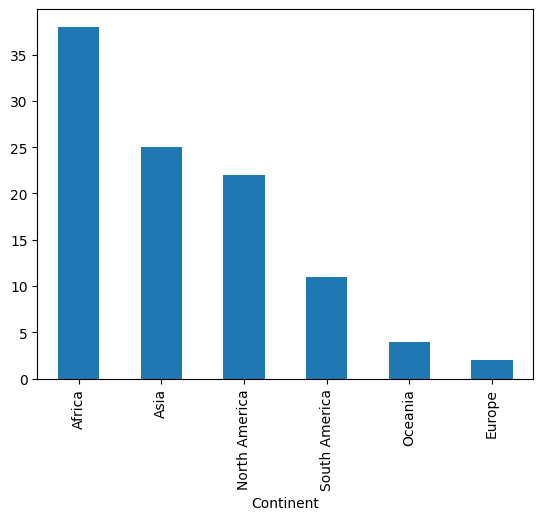

In [25]:
df1["Continent"].value_counts().plot(kind="bar")

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Count'>

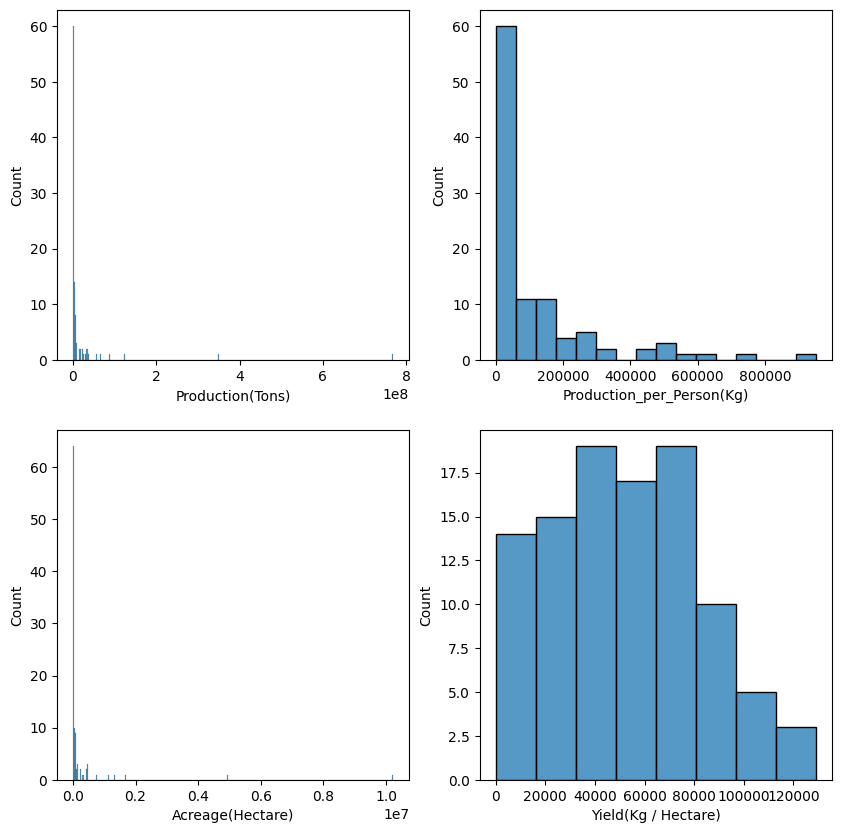

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(df1["Production(Tons)"])
plt.subplot(2,2,2)
sns.histplot(df1["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.histplot(df1["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.histplot(df1["Yield(Kg / Hectare)"])


<Axes: ylabel='Yield(Kg / Hectare)'>

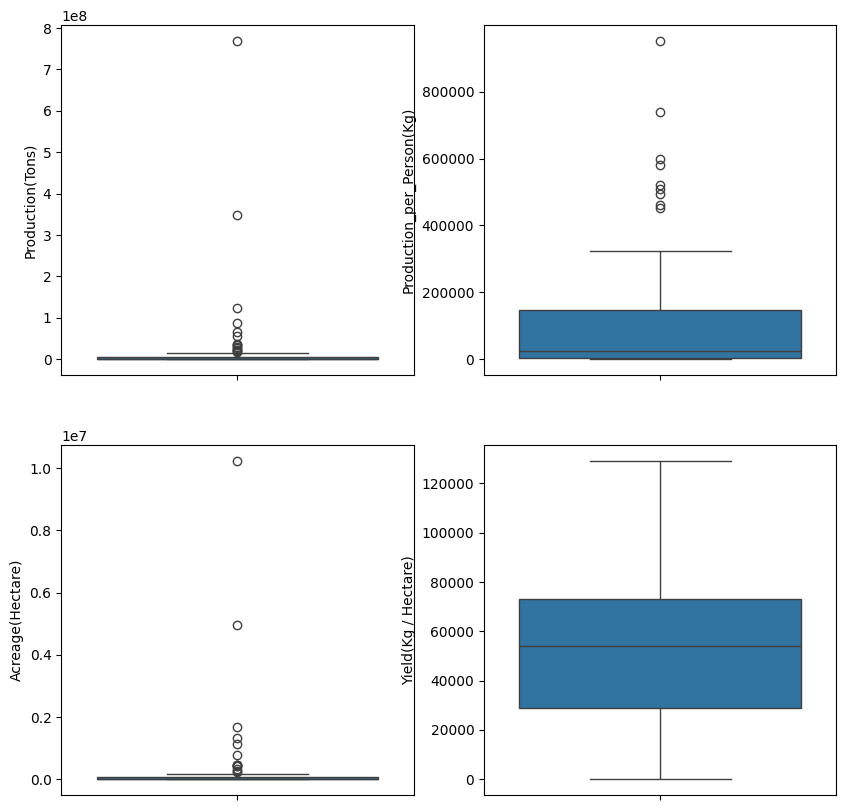

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df1["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df1["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df1["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df1["Yield(Kg / Hectare)"])
